In [1]:
import nest
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
        
nest.ResetKernel()
nest.set_verbosity("M_WARNING")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Oct 15 2023 15:12:16

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Network Architecture

Building Cortical Thalamic Network
Implement the STDP


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'V_Cr_Ex (mV)')

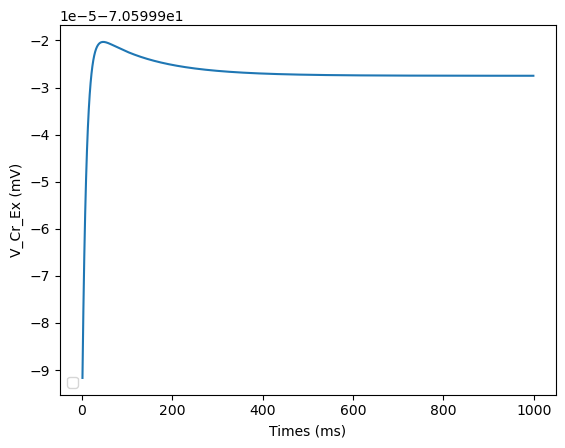

In [15]:
def CorticalThalamicNetwork():
    nest.ResetKernel()
    #nest.resolution = dt
    startbuild = time.time()
#
#   Parameter assumed by the network
    dt = 0.1
    simtime = 10.0
    p_rate = 0.5
#   
#   Number of neuron populations
    ExciCrNeuron = 180 
    InhiCrNeuron = 200
    ExciThlNeuron = 324
    InhiThlNeuron = 200
    numberNeurons = ExciCrNeuron + InhiCrNeuron + ExciThlNeuron + InhiThlNeuron
#
#   Neuron parameters -- first run
    vPeak = -40.4
    neuronParams = {"V_peak": vPeak}
#
#   Number of synapses -- Ce -> Excitatory, CI -> Inhibitory
    CE = int(ExciCrNeuron + ExciThlNeuron)
    CI = int(InhiCrNeuron + InhiThlNeuron)
    CTot = int(CE + CI)
#   
    print("Building Cortical Thalamic Network")
#
#   Set defaults - AdEx com neuroParams and Poissonian spike generator with rate p_rate
    nest.SetDefaults("aeif_cond_alpha", neuronParams)
    nest.SetDefaults("poisson_generator", {"rate": p_rate})                 
#
#   Creating populations
    NeuronsCxEx = nest.Create("aeif_cond_alpha", ExciCrNeuron)
    NeuronsCxIn = nest.Create("aeif_cond_alpha", InhiCrNeuron)
    NeuronsThEx = nest.Create("aeif_cond_alpha", ExciThlNeuron)
    NeuronsThIn = nest.Create("aeif_cond_alpha", InhiThlNeuron)
    NeuronsAll = NeuronsCxEx + NeuronsCxIn + NeuronsThEx + NeuronsThIn
#    
    noise = nest.Create("poisson_generator")
#
#   Creating voltmeters and recorders
    VmCxEx = nest.Create("voltmeter")
    VmCxIn = nest.Create("voltmeter")
    VmThEx = nest.Create("voltmeter")
    VmThIn = nest.Create("voltmeter")
    
    CrExspike = nest.Create("spike_recorder")
    CrInspike = nest.Create("spike_recorder")
    ThExspike = nest.Create("spike_recorder")
    ThInspike = nest.Create("spike_recorder")
    AllSpike = nest.Create("spike_recorder")
#
#   Configuration of the spike_recorders
    nest.Connect(VmCxEx, NeuronsCxEx)
    nest.Connect(VmCxIn, NeuronsCxIn)
    nest.Connect(VmThEx, NeuronsThEx)
    nest.Connect(VmThIn, NeuronsThIn)
    
    nest.Connect(NeuronsCxEx, CrExspike)
    nest.Connect(NeuronsCxIn, CrInspike)
    nest.Connect(NeuronsThEx, ThExspike)
    nest.Connect(NeuronsThIn, ThInspike)    
#
    print("Implement the STDP") 
    
    return VmCxEx, CrExspike, VmCxIn, CrInspike

VmCxEx, CrExspike, VmCxIn, CrInspike = CorticalThalamicNetwork()

nest.Simulate(1000)

PotCrEx = VmCxEx.get("events", "V_m")
TimesCrEx = VmCxEx.get("events", "times")



plt.plot(TimesCrEx, PotCrEx)
plt.legend(loc=3)
plt.xlabel("Times (ms)")
plt.ylabel("V_Cr_Ex (mV)")

In [7]:
nest.GetDefaults("aeif_cond_alpha")

{'a': 4.0,
 'archiver_length': 0,
 'available': (696,),
 'b': 80.5,
 'beta_Ca': 0.001,
 'C_m': 281.0,
 'Ca': 0.0,
 'capacity': (1600,),
 'Delta_T': 2.0,
 'dg_ex': 0.0,
 'dg_in': 0.0,
 'E_ex': 0.0,
 'E_in': -85.0,
 'E_L': -70.6,
 'element_type': 'neuron',
 'elementsize': 752,
 'frozen': False,
 'g_ex': 0.0,
 'g_in': 0.0,
 'g_L': 30.0,
 'global_id': 0,
 'gsl_error_tol': 1e-06,
 'I_e': 0.0,
 'instantiations': (904,),
 'local': True,
 'model': 'aeif_cond_alpha',
 'model_id': 15,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('g_ex', 'g_in', 'V_m', 'w'),
 'synaptic_elements': {},
 't_ref': 0.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 0.2,
 'tau_syn_in': 2.0,
 'tau_w': 144.0,
 'thread': -1,
 'thread_local_id': -1,
 'type_id': 'aeif_cond_alpha',
 'V_m': -70.6,
 'V_peak': -40.4,
 'V_reset': -60.0,
 'V_th': -50.4,
 'vp': -1,
 'w': 0.0}